# CUNY 620 Homework Week 5 Part 2

Team 2: Pavan Akula, Nathan(Seoungyoon) Lim, Christophe Hunt, Joel Park, Ilya Kats

It can be useful to be able to classify new "test" documents using already classified "training" documents.  A common example is using a corpus of labeled spam and ham (non-spam) e-mails to predict whether or not a new document is spam.  

Here is one example of such data:  http://archive.ics.uci.edu/ml/datasets/Spambase

For this project, you can either use the above dataset to predict the class of new documents (either withheld from the training dataset or from another source such as your own spam folder).

For more adventurous students, you are welcome (encouraged!) to come up a different set of documents (including scraped web pages!?) that have already been classified (e.g. tagged), then analyze these documents to predict how new documents should be classified.

This assignment is due end of day on Monday, July 17th.  You may work in a small team if you want.

Loading the data from the website into Jupyter Notebook.

In [3]:
#Reference: Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. 
#Irvine, CA: University of California, School of Information and Computer Science.
#Loading data from zip file
import urllib, os, zipfile, glob

open('spambase.zip', 'wb').write(urllib.urlopen(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.zip').read())

In [4]:
zip_ref = zipfile.ZipFile(os.path.realpath('spambase.zip'), 'r')
zip_ref.extractall(os.path.realpath(''))
zip_ref.close()

In [108]:
# Need to scrape the category heads
# https://stackoverflow.com/questions/2759067/rename-files-in-python
# Given that spambase.names is within the .names format, will convert the file into a readable .txt file

for filename in os.listdir('.'):
    if filename.startswith("spambase.names"):
        os.rename(filename, "spambase.names.txt")

# http://www.pythonlearn.com/html-007/cfbook012.html
# Extracting data using regular expressions

import re
hand = open('spambase.names.txt')

categories = []
for line in hand:
    if not re.match(r'\|', line):
        line = line.rstrip()
        if re.search(r'(word_freq_|char_freq_|capital_run_).+', line):   
            temp_line = line.split()
            categories.append(temp_line[0])

categories.append('spam')
categories

['word_freq_make:',
 'word_freq_address:',
 'word_freq_all:',
 'word_freq_3d:',
 'word_freq_our:',
 'word_freq_over:',
 'word_freq_remove:',
 'word_freq_internet:',
 'word_freq_order:',
 'word_freq_mail:',
 'word_freq_receive:',
 'word_freq_will:',
 'word_freq_people:',
 'word_freq_report:',
 'word_freq_addresses:',
 'word_freq_free:',
 'word_freq_business:',
 'word_freq_email:',
 'word_freq_you:',
 'word_freq_credit:',
 'word_freq_your:',
 'word_freq_font:',
 'word_freq_000:',
 'word_freq_money:',
 'word_freq_hp:',
 'word_freq_hpl:',
 'word_freq_george:',
 'word_freq_650:',
 'word_freq_lab:',
 'word_freq_labs:',
 'word_freq_telnet:',
 'word_freq_857:',
 'word_freq_data:',
 'word_freq_415:',
 'word_freq_85:',
 'word_freq_technology:',
 'word_freq_1999:',
 'word_freq_parts:',
 'word_freq_pm:',
 'word_freq_direct:',
 'word_freq_cs:',
 'word_freq_meeting:',
 'word_freq_original:',
 'word_freq_project:',
 'word_freq_re:',
 'word_freq_edu:',
 'word_freq_table:',
 'word_freq_conference:',
 '

What do the categories mean here? Let's take a look at the associated 'documentation' that came in the zip file.

Relevant Information:
"The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... Our collection of spam e-mails came from our postmaster and individuals who had filed spam.  Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam.  These are useful when constructing a personalized spam filter.  One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter."

Attribute Information:
"The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail.  The run-length attributes (55-57) measure the length of sequences of consecutive capital letters.  For the statistical measures of each attribute, see the end of this file.  Here are the definitions of the attributes:"

"48 continuous real [0,100] attributes of type word_freq_WORD = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail.  A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR = percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average = average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest = length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail."

In [109]:
# This file downloads data as .txt files. Let's convert it into .csv files
# https://stackoverflow.com/questions/39642082/convert-txt-to-csv-python-script
import csv

with open('spambase.data') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('spambase.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(categories)
        writer.writerows(lines)

Let's review what the .csv file and "documentation" file contain:

Number of Instances:
"4601 (1813 Spam = 39.4%)"

Number of Attributes:
"58 (57 continuous, 1 nominal class label)"

Missing Attribute Values:
"None"

Class Distribution:
	Spam	  1813  (39.4%)
	Non-Spam  2788  (60.6%)

In [113]:
# Loading libraries
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

/Users/Joel/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [119]:
# Creating a decision tree algorithm 
# http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
# Using scikit
base_directory = os.getcwd()

balance_data = pd.read_csv(base_directory + '/spambase.csv', sep = ',')

In [127]:
# Checking the length and dimensions of our dataframe
print "Dataset Length:: ", len(balance_data)
print "Dataset Shape:: ", balance_data.shape

Dataset Length::  4601
Dataset Shape::  (4601, 58)


In [129]:
# Listing the first 5 observations in this data.
print "Dataset:: "
balance_data.head()

Dataset:: 


,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Data Slicing: Spliting the data into train and test tests.

Let's create an "X" set that consists of predictor variables (1st column to the 57th column), and then create a "Y" set which consists of the outcome variable.

We are using ".values" of numpy converting our dataframes into numpy arrays

In [251]:
X = balance_data.values[:, 0:57]
Y = balance_data.values[:, 57]

In [252]:
# This snippet will split the data into training and test set. 
# X_train, y_train are training X_test, y_test belongs to the test dataset.
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

The parameter test_size is given value 0.3; it means test sets will be 30% of whole dataset  & training dataset’s size will be 70% of the entire dataset. random_state variable is a pseudo-random number generator state used for random sampling. If you want to replicate our results, then use the same value of random_state.

# Decision Tree Training

Now we fit Decision tree algorithm on training data, predicting labels for validation dataset and printing the accuracy of the model using various parameters.

In [253]:
# Decision Tree Classifier with Criterial Gini Index
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [254]:
# Decision Tree with criterial information gain (entropy)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

# Tree Visualization

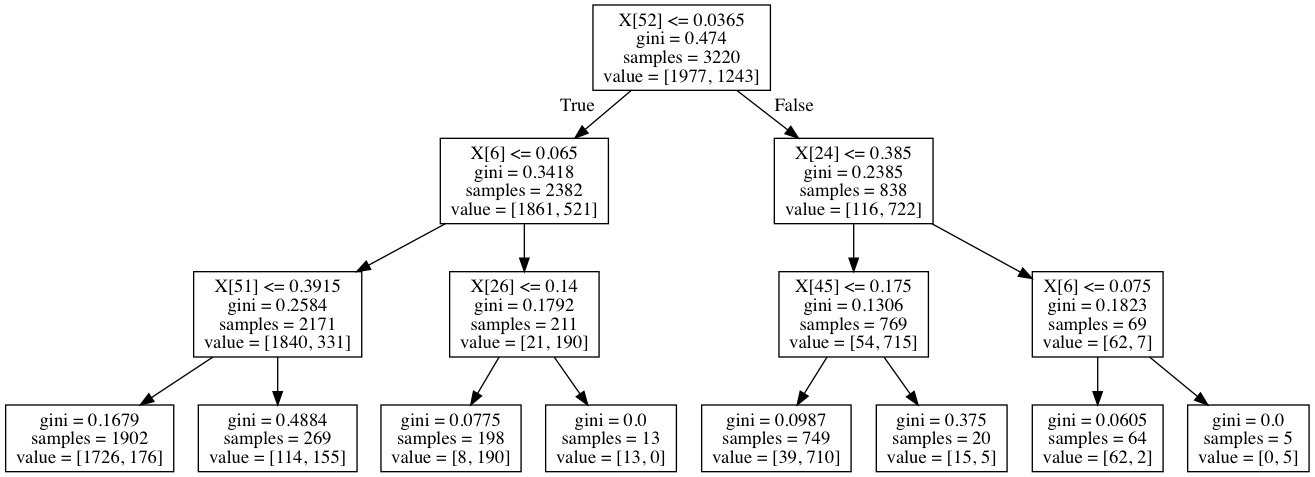

In [255]:
# https://stackoverflow.com/questions/39956430/plotting-decision-tree-graphvizm-pydotplus
# If you received a 'GraphViz's executables not found, 
# You must install homebrew on your computer first
# /usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"
# type in terminal 'brew install graphviz'
# Graphviz should now work!

import graphviz
import pydotplus
from IPython.display import Image 

# Gini Model
dot_data = tree.export_graphviz(clf_gini, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

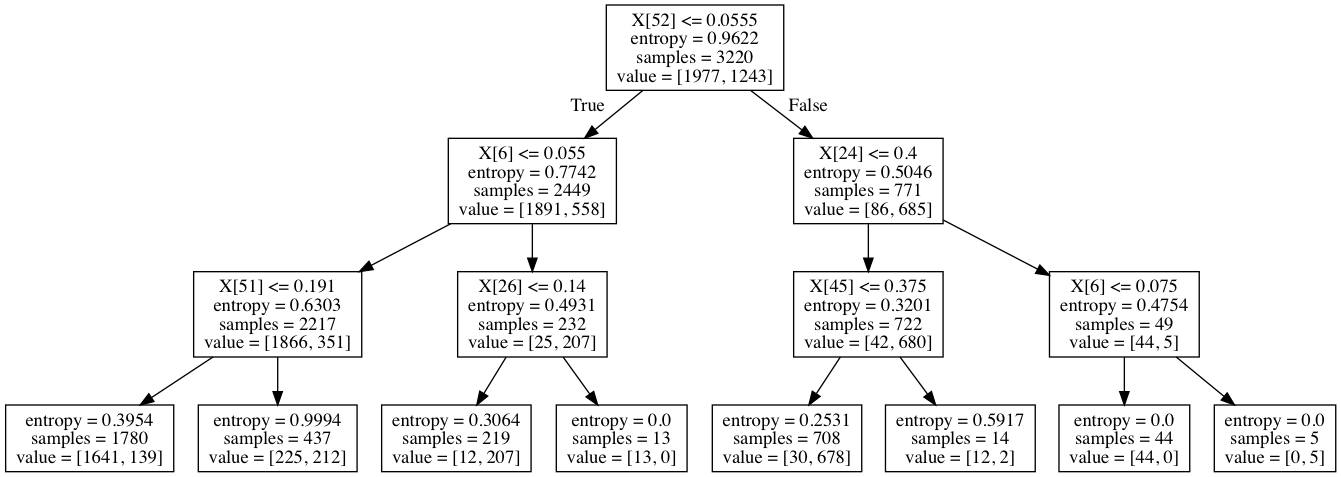

In [256]:
# Entropy (Information Gain) Model
dot_data = tree.export_graphviz(clf_entropy, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

# Prediction

There are two models now. one classifier is with the gini index and the other one with entropy. Let's see how our the models work with the test sets.

In [257]:
y_pred = clf_gini.predict(X_test)
y_pred

array([ 0.,  1.,  0., ...,  0.,  1.,  0.])

In [258]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([ 0.,  1.,  0., ...,  0.,  1.,  0.])

# Calculating Accuracy Score

In [259]:
# Calculating the accuracy for decision tree classifier with criterion as gini index
print "Accuracy (Gini Index) is ", accuracy_score(y_test,y_pred)*100

Accuracy (Gini Index) is  88.4866039102


In [260]:
# Calculating the accuracy for decision tree classifier with criterion as entropy (information gain)
print "Accuracy (Entropy) is ", accuracy_score(y_test,y_pred_en)*100

Accuracy (Entropy) is  85.8797972484


In [261]:
################ Clearly there is something wrong...perhaps overfitting?""""""

# K Nearest Neighbors Classifier

In [262]:
# http://scikit-learn.org/stable/modules/tree.html

In [263]:
# k-Nearest neighbors classifier
# The simplest possible classifier is the nearest neighbor: 
# given a new observation X_test, find in the training set 
# (i.e. the data used to train the estimator) the observation with the closest feature vector. 
import numpy as np

np.random.seed(0)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [264]:
# We can compare how the predictions compare to the actual results
knn_pred = knn.predict(X_test)
knn_pred

array([ 1.,  0.,  0., ...,  0.,  1.,  1.])

In [265]:
y_test

array([ 0.,  1.,  0., ...,  1.,  1.,  1.])

In [266]:
# Calculating the accuracy for decision tree classifier with criterion as gini index
print "Accuracy (k-Nearest Neighbors) is ", accuracy_score(y_test,knn_pred)*100

Accuracy (k-Nearest Neighbors) is  79.0731354091


# Support Vector Machines

In [267]:
# Support Vector Machines
# http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html

Support Vector Machines belong to the discriminant model family: they try to find a combination of samples to build a plane maximizing the margin between the two classes. 

In [ ]:
#from sklearn import svm
#svc = svm.SVC(kernel='linear')
#svc.fit(X_train, y_train)